In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.manifold import MDS
from PIL import Image
import os
import pingouin as pg
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import orthogonal_procrustes
from nltk.corpus import wordnet as wn
import json
import pickle
import gc

import ecoset
import categorization as cat
import train
import utils

# Seed for reproducibility
np.random.seed(2023)
tf.random.set_seed(2023)

# Within level cluster indices
within_level_cluster = True


def clear_model():
    # Check if model variable exists
    if "model" in globals():
        del globals()["model"]
        tf.keras.backend.clear_session()
        gc.collect()

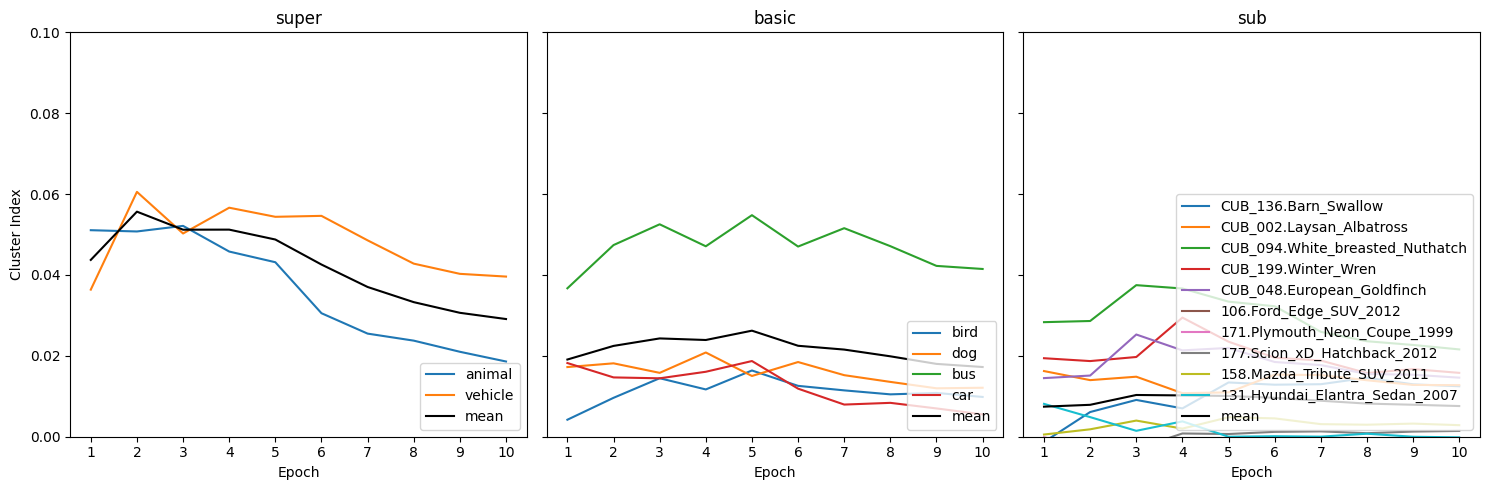

In [ ]:
# Create three subplots for each level
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Loop through each level
for i, level in enumerate(levels):
    # Get the categories for the level
    categories = tmpClusters.levelMap[level]

    # Loop through categories
    for j, category in enumerate(categories):
        # Get the data for the category
        tmp = controlClusterData.loc[(controlClusterData["catLevel"] == category)]

        # Plot
        ax[i].plot(tmp["epoch"], tmp["clusterIndex"], label=category)

    # Plot the mean line
    ax[i].plot(
        tmp["epoch"],
        controlClusterData.loc[controlClusterData["catLevel"] == level]["clusterIndex"],
        label="mean",
        color="k",
    )
    # Set title
    ax[i].set_title(level)

    # Add legend to the bottom right
    ax[i].legend(loc="lower right")

    # Set x axis to 1-10
    ax[i].set_xticks(range(10))
    ax[i].set_xticklabels([str(num) for num in range(1, 11)])
    ax[i].set_xlabel("Epoch")

    # Set y axis between 0 to 0.1
    ax[i].set_ylim(0, 0.1)

ax[0].set_ylabel("Cluster Index")

# Tight
plt.tight_layout()
fig.show()